In [1]:
%%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [2]:
# MECA654, March 2018, Pierre Nagorny
# Polytech Annecy-Chambéry, SYMME lab, Savoie Mont Blanc University

# HINTS: Check the nice tuto about vector calculus !
# http://docs.sympy.org/latest/modules/physics/vector/vectors.html

from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, Math, YouTubeVideo
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt  # Loading Pyplot
from scipy.interpolate import interp1d
# Setting Matplotlib render backend
%matplotlib notebook
# %matplotlib nbagg
# %pylab inline
from sympy import *  # Loading Sympy for symbolic calculus
from sympy.physics.vector import *  # Everything needed for vector calculs, Reference frame, dynamic
from sympy.physics.vector import init_vprinting  # To print time varying vectors

init_printing()
init_vprinting(pretty_print=True)

# Display full output in Jupyter Notebook
InteractiveShell.ast_node_interactivity = "all"

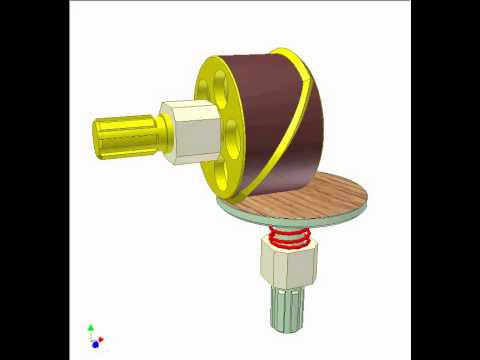

In [3]:
YouTubeVideo('UblRctFXjh4', height=500, width=478)

__MECA654, March 2018, Polytech Annecy-Chambéry__  
[This interactive notebook is on Github](https://github.com/a1rb4Ck/MECA654)  
## Exercise 8 - Friction wheel
### Rotations composition
$\dot{\theta_{01}}$ rotation speed of axis $\vec{i_1}$  
$\dot{\theta_{02}}$ rotation speed of axis $\vec{i_2}$  

![Mechanism schematic](./img/k_Ex8.svg)

In [4]:
# Define used symbols for SymPy, constant variables
alpha, R_1, R_2, t = symbols('alpha R_1 R_2 t')  # the time is a symbol.
# Define dynamic symbols, variables function of time (t)
theta_1, theta_2, OM = dynamicsymbols('theta_1 theta_2 OM')
theta_1dot = dynamicsymbols('theta_1', 1)  # First order derivative of theta_1
theta_2dot = dynamicsymbols('theta_2', 1)  # First order derivative of theta_2

# Our reference frames for each body:

B0 = ReferenceFrame('B0', indices=['i', 'j', 'k'])
B1 = ReferenceFrame('B1', indices=['i', 'j', 'k'])
B2center = ReferenceFrame('B2center', indices=['i', 'j', 'k'])
B2 = ReferenceFrame('B2', indices=['i', 'j', 'k'])

# We define space transformation relations in our problem:
B1.orient(B0, 'Axis', [theta_1, B0.x])  # Rotation of theta_1 (i_0), same as (k_1)
B2center.orient(B0, 'Axis', [alpha-(pi/2), B0.z])  # Rotation of axis (k_0), same as (k_1)
B2.orient(B2center, 'Axis', [theta_2, B2center.x])  # Rotation of axis (k_0), same as (k_1)

# We can view the Direct Cosinus Matrix between both reference frames!
# B1.dcm(B0)
# B2center.dcm(B0)
# B2.dcm(B0)
# B2.dcm(B1)

**1. You should determined:**
   - **$\overrightarrow{V_{01}(M)}$ in the $(0)$ reference frame:  **  

In [5]:
# We define the OM vector translation
OM = - R_1 * B1['j']  # O is the center
display(Math(r'\overrightarrow{OM}=%s \ %s' % (latex(OM), latex('in \ the \ B_2 \ base'))))

<IPython.core.display.Math object>

In [6]:
V_01 = OM.dt(B0)  # B0 is the same as B1
# V_01  # V_01 in the B0 frame
display(Math(r'\overrightarrow{V_{01}(M)}=%s \ %s' % (latex(V_01), latex('in \ the \ B_0 \ base'))))

<IPython.core.display.Math object>

   - **$\overrightarrow{V_{02}(M)}$ in the $(0)$ reference frame:  **

In [7]:
OM_2 = - R_2 * B2['j']
display(Math(r'\overrightarrow{OM}=%s \ %s' % (latex(OM_2), latex('in \ the \ B_2 \ base'))))
display(Math(r'\overrightarrow{OM}=%s \ %s' % (latex(OM_2.express(B2center)), latex('in \ the \ B_2center \ base'))))

V_02 = OM_2.dt(B2center)
display(Math(r'\overrightarrow{V_{02}(M)}=%s \ %s' % (latex(V_02), latex('in \ the \ B_2 \ base'))))

# Express the vector that we originally wrote in the B2 frame, in the B0 frame:
V_02 = V_02.express(B0)
display(Math(r'\overrightarrow{V_{02}(M)}=%s \ %s' % (latex(V_02), latex('in \ the \ B_0 \ base'))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

- **Assuming a no slipping contact in $M$, we have $\overrightarrow{V_{12}(M)} = 0$  
Find the relation between $\overrightarrow{V_{01}(M)}$, $\overrightarrow{V_{02}(M)}$, $\dot{\theta_{01}}$, $\dot{\theta_{02}}$**  


In [8]:
# V_01 + V_12 = V_02
# V_12 = V_02 - V_01
# and V_12.k = 0  hence, we have:
display(Math(r'\overrightarrow{V_{01}(M)} + \overrightarrow{V_{12}(M)}=\overrightarrow{V_{02}(M)}'))
display(Math(r'\overrightarrow{V_{12}(M)} = \overrightarrow{V_{02}(M)} - \overrightarrow{V_{01}(M)}'))
display(Math(r'and \ \overrightarrow{V_{12}(M).k}=0 \ %s' % latex('\ hence, \ we \ have:')))
V_12 = V_02.to_matrix(B0) - V_01.to_matrix(B0)
display(Math(r'\overrightarrow{V_{01}(M)} - \overrightarrow{V_{02}(M)}= \ %s %s' % (latex(V_12), latex(Matrix([B0.name + '_i', B0.name + '_j', B0.name + '_k'])))))
display(Math(r'\overrightarrow{V_{12}(M).k} = \ %s \ = 0' % latex(V_12[2])))

# We solve the linear equation which keeps derivatives theta_xdot (asked question):
sdot = solve(V_12[2], theta_1dot)
display(Math(r'\dot{\theta_1} = \ %s' % latex(sdot)))
# We solve the linear equation which keeps derivatives theta_xdot (asked question):

# Bonus: We solve to find R_1 function of everything else:
sR1 = solve(V_12[2], R_1)
display(Math(r'R_1 = \ %s' % latex(sR1)))

# Bonus: We solve the Ordinary Differential Equation (ODE) to find theta_1(t):
solutions = dsolve(V_12[2], theta_1)
solutions

# Bonus: We optimize to find the maximal velocity with R_1 and R_2 parameters
## Find the zero derivative:
# f = solutions[1]  # .subs(t, 1)
# We divide by theta_1 to maximize the ratio between theta_1 and theta_2
# t2 = symbols('t2')
# fprime = diff(f.args[1].subs(theta_2, t2), t2)
# fprime
# solve(Eq(fprime, 0), R_1)

# f = asin(R_2*sin(theta_2)/R_1)
# fprime = f.diff(func, theta_2)

# from scipy import optimize
# def f_theta_1(theta_2_subs): return solutions[1].subs(t, 1).subs(theta_2, theta_2_subs)
# max_x = optimize.fmin(lambda x: -f_theta_1(x), 0)
# max_x


# V_12 = V_02.to_matrix(B0).col_insert(3,V_01.to_matrix(B0))
# C1, C2, C3 = symbols('C1 C2 C3')
# theta_1 = Function('theta_1')
# theta_2 = Function('theta_2')
# diffeq = tuple([Eq(eq) for eq in V_12])
# diffeq
# from sympy.solvers.ode import odesimp
# odesimp(diffeq, theta_1(t), 1, {C1, C2}, hint='1st_homogeneous_coeff_subs_indep_div_dep')

# No Sympy function seems to be able to perform Gaussian Jordan reduction with many symbols and derivatives.
# Thus, we substract line 1 and line 2:
# gausseq = (diffeq[0], Eq(diffeq[0].args[0], diffeq[1].args[0]).simplify(), diffeq[2])
# gausseq
# We could get some hint on the first ODE:
# classify_ode(gausseq[0], theta_1(t))
# ode_order(gausseq[0], theta_1(t))

# from sympy.solvers.ode import infinitesimals
# infinitesimals(diffeq[0:-1], [theta_1(t), theta_2(t)])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Usefulness of friction transmissions : Continuous Variable Transmissions (CVT)

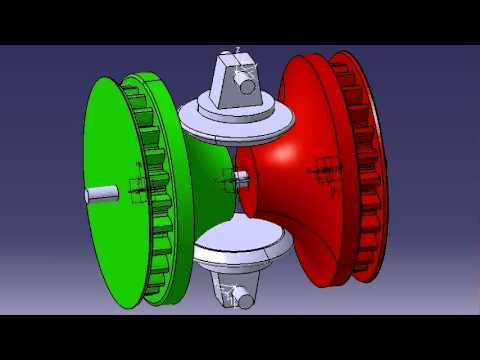

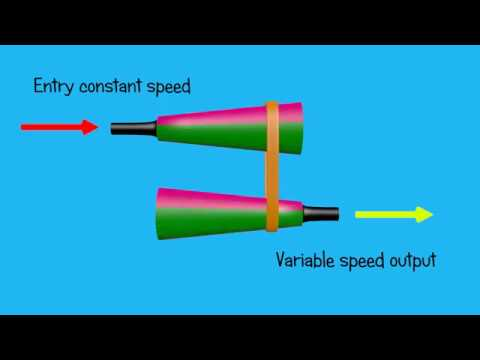

In [9]:
YouTubeVideo('LHoAh2Bo83c', height=500, width=800)
YouTubeVideo('2wpK-LDvtuc', height=500, width=800)

In [10]:
%%HTML
<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, Sympy, Numpy &emsp; - &emsp; MECA654 &nbsp; - &nbsp; Polytech Annecy-Chambéry &nbsp; - &nbsp; Pierre Nagorny &nbsp; - &nbsp; March 2018
</footer>